In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import read_input_data, utility
from constants import *

In [2]:
# get the survival probability
data_dir_path = '/Users/Quintus/Google Drive/Dynamic Programming/code/data/'
income_fp = os.path.join(data_dir_path, 'age_coefficients_and_var.xlsx')
mortal_fp = os.path.join(data_dir_path, 'Conditional Survival Prob Feb 16.xlsx')
age_coeff, std, surv_prob = read_input_data(income_fp, mortal_fp)
cond_prob = surv_prob.loc[START_AGE:END_AGE, 'CSP']
prob = cond_prob.cumprod().values

In [12]:
# read consumption process and income process
results_dir_path = '/Users/Quintus/Google Drive/Dynamic Programming/code/results/'
# c_proc_fp = os.path.join(results_dir_path, 'c process_College Graduates.xlsx')
inc_proc_fp = os.path.join(results_dir_path, 'inc process_College Graduates.xlsx')

# c_proc_df = pd.read_excel(c_proc_fp)
inc_proc_df = pd.read_excel(inc_proc_fp)

In [ ]:
c_proc_df.describe()

## Searching for negative income in the income process

In [15]:
inc_proc = np.array(inc_proc_df)
num_neg_inc = np.sum(inc_proc < 0)
idx_neg_inc = np.nonzero(inc_proc < 0)
print('Number of negative income: ', num_neg_inc)
print('Index of negative income: ', idx_neg_inc)

np.unique(idx_neg_inc[0])

Number of negative income:  11986
Index of negative income:  (array([    5,     5,     5, ..., 99967, 99978, 99995]), array([1, 4, 5, ..., 6, 0, 1]))


array([    5,     6,    12, ..., 99967, 99978, 99995])

In [20]:
below_zero = inc_proc[np.unique(idx_neg_inc[0]), :10]
below_zero_df = pd.DataFrame(below_zero)
below_zero_df.to_excel('inc.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(22, 32), below_zero.T)
plt.grid()
plt.show()

## Calculating CE

In [5]:
# convert df to array
c = np.array(c_proc_df)

# discount factor
YEARS = END_AGE - START_AGE + 1
delta = np.ones((YEARS, 1)) * DELTA
delta[0] = 1
delta = np.cumprod(delta)

# calculate utility of each step for each simulation,  and total utility for each simulation
util_c = np.apply_along_axis(utility, 1, c, GAMMA)
simu_util = np.sum(np.multiply(util_c[:, :44], (delta * prob)[:44]), axis=1)

### Scatter Graph of the simulated unitility

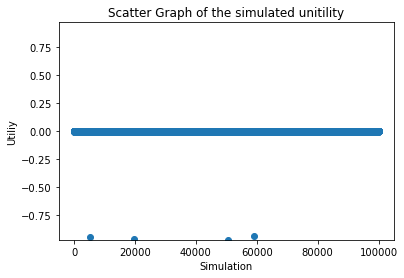

In [6]:
plt.figure()
x = np.arange(N_SIM)
plt.scatter(x, simu_util)
plt.ylim(simu_util.min(), -simu_util.min())
plt.title('Scatter Graph of the simulated unitility')
plt.xlabel('Simulation')
plt.ylabel('Utiliy')
plt.show()

In [ ]:
b = [simu_util.min(), -0.1**5, -0.1**6, -0.1**7, -0.1**8, -0.1**9, -0.1**10, -0.1**11, -0.1**12, -0.1**13, -0.1**14]
plt.figure()
n, bins, patches = plt.hist(simu_util, bins=b)
plt.show()

In [42]:
n

array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         3.50000000e+01,   3.99000000e+02,   4.15100000e+03,
         2.62670000e+04,   6.90740000e+04])

In [43]:
bins

array([ -1.00000000e-05,  -1.00000000e-06,  -1.00000000e-07,
        -1.00000000e-08,  -1.00000000e-09,  -1.00000000e-10,
        -1.00000000e-11,  -1.00000000e-12,  -1.00000000e-13])

In [46]:
simu_util.min()

-0.3225502211597816